# Lab instruction: Handling data imbalance

Data imbalance is a situation where the samples of one class are under/over represented. The samples that are over-represented are referred to as the matority class, while the samples of the under-represented class are referred to as minority class. To visualiza this aspect. We provide an initial code which generates data points from a synthetic data distributions and removes a percentage of points of one of the clases, which causes an umbalanced dataset.

In [2]:
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
import seaborn as sns

def showDecisionBoundary(X_train, y_train, classif):
    feature_1, feature_2 = np.meshgrid(
        np.linspace(X_train[:,0].min(), X_train[:,0].max()),
        np.linspace(X_train[:,1].min(), X_train[:,1].max()))

    grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

    y_pred = classif.predict( grid )
    y_pred = np.reshape(y_pred, feature_1.shape)

    display = DecisionBoundaryDisplay(
        xx0=feature_1, xx1=feature_2, response=y_pred)

    display.plot()
    display.ax_.scatter(
        X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="black")



import numpy as np
from sklearn.utils import resample

def downsample_class_numpy(X, y, target_label, target_percentage):
    """
    Downsamples a specific class in a binary classification dataset represented as NumPy arrays.

    Parameters:
    - X: numpy array of features
    - y: numpy array of labels
    - target_label: the class label to downsample
    - target_percentage: percentage (0-100) of the original size to retain

    Returns:
    - X_downsampled: numpy array of features after downsampling
    - y_downsampled: numpy array of labels after downsampling
    """
    # Identify indices of the target class and the other class
    target_indices = np.where(y == target_label)[0]
    other_indices = np.where(y != target_label)[0]

    # Calculate number of samples to retain
    n_samples = int(len(target_indices) * target_percentage / 100)

    # Downsample the target class
    downsampled_target_indices = resample(
        target_indices,
        replace=False,
        n_samples=n_samples,
        random_state=42
    )

    # Combine indices and shuffle
    combined_indices = np.concatenate([downsampled_target_indices, other_indices])
    np.random.seed(42)
    np.random.shuffle(combined_indices)

    # Return downsampled arrays
    return X[combined_indices], y[combined_indices]


def countPlotClass(y):
    sns.countplot(x=y)
    plt.title("Number of Samples per Class")
    plt.xlabel("Class Label")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig("sample_count_plot.png")
    plt.show()


Generating the imbalanced dataset|

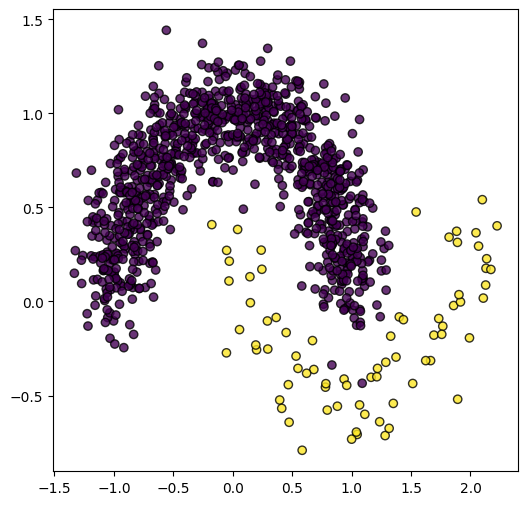

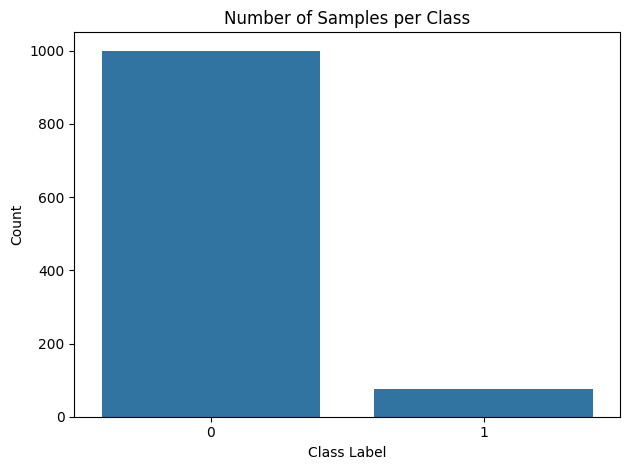

In [3]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=2000, noise=0.15, random_state=42)
Xi, yi = downsample_class_numpy(X, y, target_label=1, target_percentage=7.5)

_, ax = plt.subplots(figsize=(6, 6))
_ = ax.scatter(Xi[:, 0], Xi[:, 1], c=yi, alpha=0.8, edgecolor="k")
plt.show()

countPlotClass(yi)

Having explored the data, let's train a model with it and compute the confusion matrix, as well as the accuracy and the balanced accuracy. The balanced accuracy is an accuracy measurement that thakes into account the data imbalance.

Although the module of this class is on neural networks, the MLP classifier built in Scipy does not allow to performn class weighting by default. As a simpler case we will use a random forest classifer instead. For this tak, train a random forest classifier wih a depth of 4, 20 estimators with the entropy criterion. Afterwards plot the confsion matrix and print the accuracy and the balanced accuracy.

What can you say from the classification errors? Why is there a discrepancy between the accuracy and the balanced accuracy measurements?

Accuracy: 0.99
Balanced accuracy: 0.93


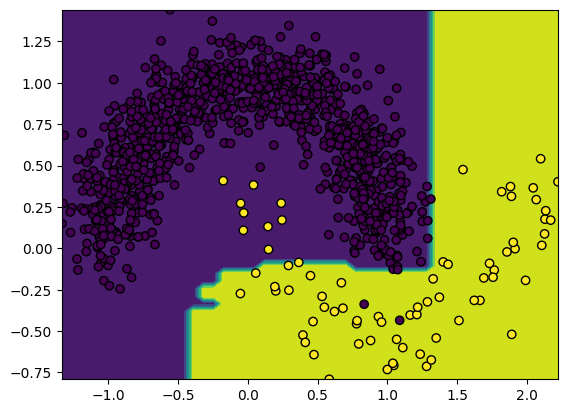

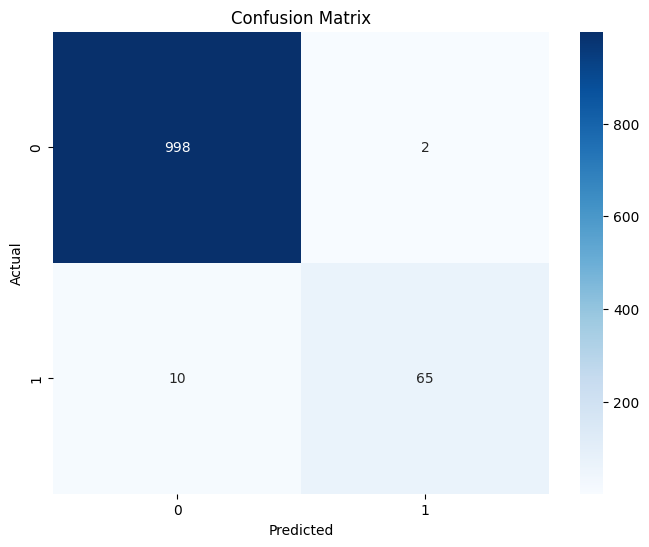

In [4]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns


# Compensating for class imbalance 
clf = RandomForestClassifier(
    n_estimators=20,      # Number of trees
    max_depth=4,        # Allow trees to grow fully
    max_features='sqrt',   # Use sqrt(features) for splitting
    random_state=42,
    n_jobs=-1,             # Use all available CPU cores
    #class_weight= "balanced", #class_weights,
    criterion="entropy",
)

clf.fit(Xi, yi)
y_pred = clf.predict(Xi)

showDecisionBoundary(Xi, yi, clf)


# Besides regular accuracy, computing balanced accuracy
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(yi, y_pred)
baccuracy = balanced_accuracy_score(yi, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Balanced accuracy: {baccuracy:.2f}")


# Print results
conf_matrix = confusion_matrix(yi, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

There are different ways to handle data imbalance. A simple approacg is to weight differently the loss that is applied during training in such a way that the missclassifications of the minority class have more importance.

For this retrain the classidier with the class_weight set to "balanced".

Accuracy: 0.99
Balanced accuracy: 0.93


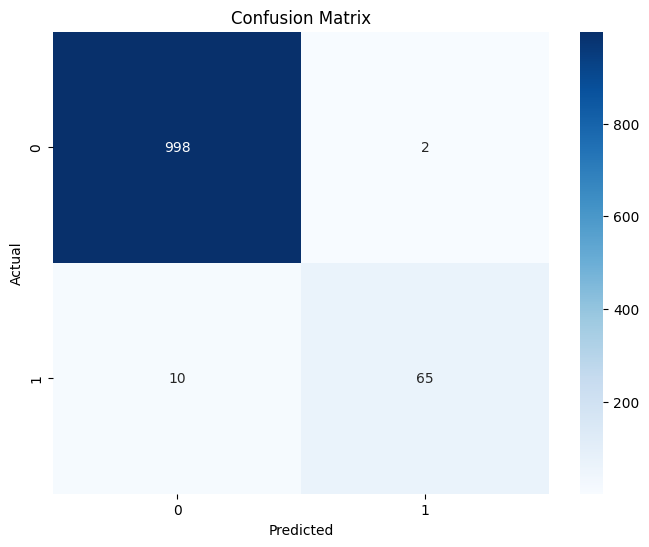

In [5]:
# Add your code for training the random forest with class imbalance compenstion here, as well as the (balanced) accouracy evaluation on the training set


accuracy = accuracy_score(yi, y_pred)
baccuracy = balanced_accuracy_score(yi, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Balanced accuracy: {baccuracy:.2f}")


# Print results
conf_matrix = confusion_matrix(yi, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

An alternative approach to reduce class imbalance is to oversample the majority class, or to undersample the minority class. For this, implement a function which radomply oversamples the minority class to match the number of samples of the majority class.

In [6]:
# Make youe code for generating the random oversampling technique here

In [7]:
# This icode runs the function that you implement

Xr, yr = random_oversample_minority_class(Xi, yi)
countPlotClass(yr)

# Compensating for class imbalance 
clf = RandomForestClassifier(
    n_estimators=20,      # Number of trees
    max_depth=4,        # Allow trees to grow fully
    max_features='sqrt',   # Use sqrt(features) for splitting
    random_state=42,
    n_jobs=-1,             # Use all available CPU cores\
    criterion="entropy",
)

clf.fit(Xr, yr)
y_pred = clf.predict(Xi)

showDecisionBoundary(Xi, yi, clf)


# Besides regular accuracy, computing balanced accuracy
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(yi, y_pred)
baccuracy = balanced_accuracy_score(yi, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Balanced accuracy: {baccuracy:.2f}")


# Print results
conf_matrix = confusion_matrix(yi, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

NameError: name 'random_oversample_minority_class' is not defined

This works okay! Now discuss with your classmates the following. What are the advantages, or disadvantages of this method? What if you used the opposite approach and downsampled the minority class? Would that have any advantages/disadvantages?

Now that we have this approach. Apply train an MLP with random upsampling and test your model

In [ ]:
from sklearn.neural_network import MLPClassifier

# Put the code for training your MLPClassifier here, Train it with the randomply upsampled dataset

clf.fit(Xr, yr)
y_pred = clf.predict(Xi)

showDecisionBoundary(Xi, yi, clf)


# Besides regular accuracy, computing balanced accuracy
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(yi, y_pred)
baccuracy = balanced_accuracy_score(yi, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Balanced accuracy: {baccuracy:.2f}")


# Print results
conf_matrix = confusion_matrix(yi, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier

# Put the code for training your MLPClassifier here, Train it with the umbalanced upsampled dataset



clf.fit(Xi, yi)
y_pred = clf.predict(Xi)

showDecisionBoundary(Xi, yi, clf)


# Besides regular accuracy, computing balanced accuracy
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(yi, y_pred)
baccuracy = balanced_accuracy_score(yi, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Balanced accuracy: {baccuracy:.2f}")


# Print results
conf_matrix = confusion_matrix(yi, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

It seems that Scipy's MLP classifier has built in handling of class imbalance! This is not documented in Scipy's website, but it is nice! Note that this is not common in other packages to train neural networks and that in such cases, you may have to implement these things by yourself. 